In [2]:
import re
import csv
import pandas as  pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
input_file = r"D:\New folder (4)\sh.txt"
output_file = r"D:\New folder (4)\output.csv"

In [4]:
# Date pattern to match the date in the format "YYYY-MM-DD HH:MM:SS,"
date_pattern = r'(\d{4})-\d{2}-\d{2} \d{2}:\d{2}:\d{2},'

# Reading the data from the text file
with open(input_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Opening a CSV file to write the data
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # Writing the headers
    writer.writerow(['Year', 'Category', 'Statement'])

    current_year = None
    for line in lines:
        # Attempt to extract the year from the line
        date_match = re.match(date_pattern, line)
        
        if date_match:
            current_year = date_match.group(1)  # Extract the year
        
        # Extracting the categories and statements correctly
        if '[' in line and ']' in line:
            # Extracting categories found in brackets []
            categories = re.findall(r'\[(.*?)\]', line)
            
            # Extracting the statement by removing everything inside brackets []
            statement = re.sub(r'\[.*?\]', '', line).strip()
            
            # Writing each category with its corresponding statement and year into CSV
            if current_year:  # Ensure we have a valid year
                for category in categories:
                    category = category.strip()  # Remove any extra whitespace
                    if len(category) <= 20:  # Limit the category length to 20 characters
                        writer.writerow([current_year, category, statement])

print(f"Data successfully written to {output_file}")

Data successfully written to D:\New folder (4)\output.csv


In [5]:
df = pd.read_csv(output_file)

In [6]:
df.head()

,Year,Category,Statement
0,2022,general,foreign it's really a great pleasure and an ho...
1,2022,policy,ladies and gentlemen it is the guiding princip...
2,2022,action,nothing could be more important to us than thi...
3,2022,development,we are living through truly transformational t...
4,2022,general,but the pace of transformation and change was ...


In [7]:
df.shape

(3352, 3)

In [8]:
df.isnull().sum()

Year           0
Category       0
Statement    225
dtype: int64

In [9]:
 df = df.dropna()

In [10]:
df.isnull().sum()

Year         0
Category     0
Statement    0
dtype: int64

In [11]:
df.describe()

,Year
count,3127.000000
mean,2022.536617
std,1.156300
min,2018.000000
25%,2022.000000
50%,2022.000000
75%,2023.000000
max,2024.000000


In [12]:
top_years = df["Year"].value_counts()
top_years

Year
2022    1620
2023     724
2024     681
2018     102
Name: count, dtype: int64

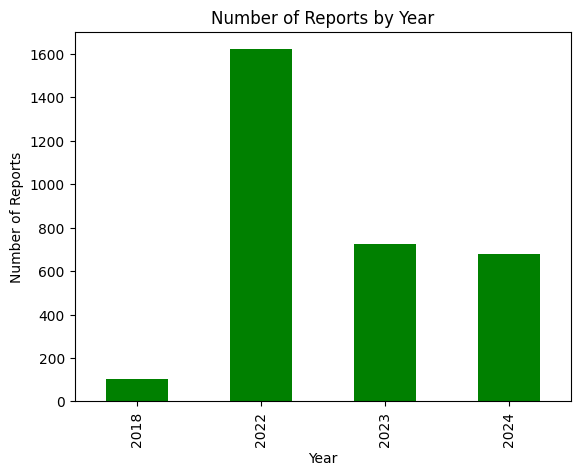

In [13]:
top_years.sort_index().plot(kind = "bar",color = "green")
plt.title('Number of Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.show()

In [14]:

df["Category"].value_counts()

Category
general                 1028
governance               361
development              321
finance                  301
action                   273
cooperation              262
welfare                  143
corruption               118
policy                   101
people                    80
appreciation              18
law and order             17
solidarity                10
politics                   9
army                       7
history                    7
humanitarian               6
commitment                 5
Praise                     5
defense                    4
healthcare                 4
__                         4
environment                3
security                   3
people, welfare            2
corruption, finance        2
trade                      2
PML-N                      2
education                  2
finance, corruption        2
disaster management        2
leadership                 2
establishment              2
praise                     2
welfa

In [15]:
category_counts = df['Category'].value_counts()


top_categories = category_counts.head(10).index


filtered_df = df[df['Category'].isin(top_categories)]


print(filtered_df)

      Year     Category                                          Statement
0     2022      general  foreign it's really a great pleasure and an ho...
1     2022       policy  ladies and gentlemen it is the guiding princip...
2     2022       action  nothing could be more important to us than thi...
3     2022  development  we are living through truly transformational t...
4     2022      general  but the pace of transformation and change was ...
...    ...          ...                                                ...
3346  2023      general  If you have a beautiful personality, then you ...
3347  2023      general                          Otherwise, this is pride.
3348  2023      general  Some may pluck you from the chaman and keep yo...
3349  2023      general  Everyone, let us not go to Pakistan Zindabad P...
3350  2023  development                And those in the room will grow up.

[2988 rows x 3 columns]


<Axes: title={'center': 'Top 20Most Mentioned Categories'}, xlabel='Category', ylabel='Number of Mentions'>

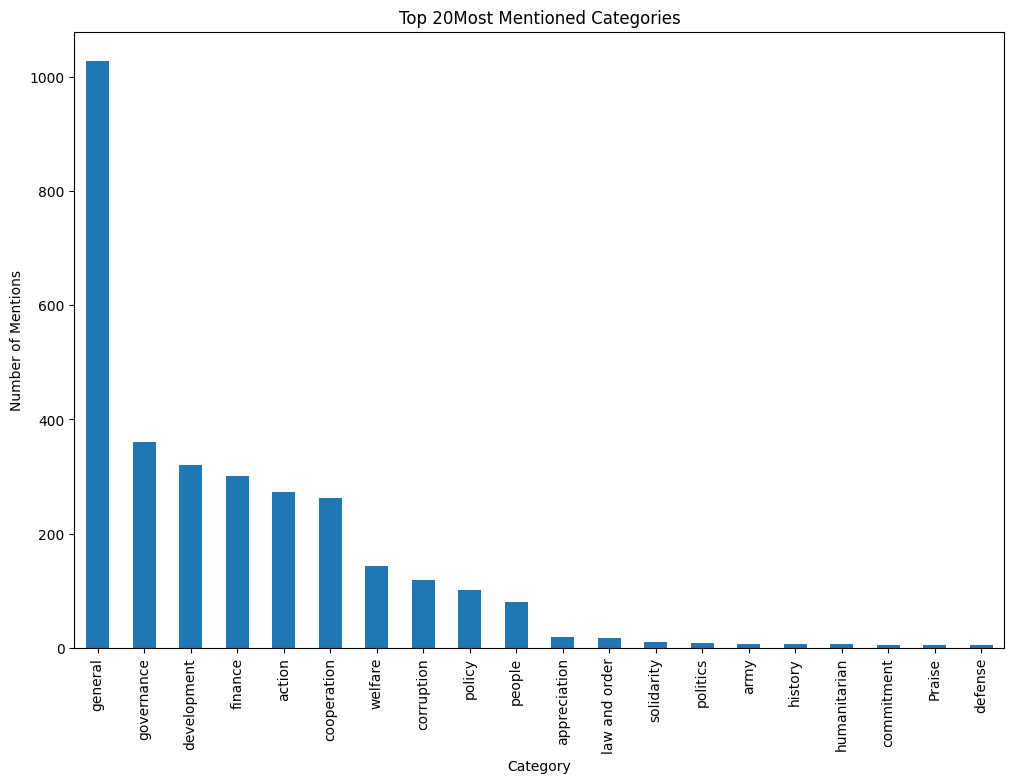

In [16]:
plt.figure(figsize = (12,8))
top_Category = df["Category"].value_counts().head(20)
plt.title("Top 20Most Mentioned Categories")
plt.xlabel('Category')
plt.ylabel('Number of Mentions')
top_Category.plot(kind = "bar")


In [23]:
df.columns

Index(['Year', 'Category', 'Statement'], dtype='object')

In [19]:
# Count occurrences of each category by year
category_year_counts = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Calculate percentages
category_year_percentages = category_year_counts.div(category_year_counts.sum(axis=1), axis=0) * 100

# Reset index for Plotly
category_year_percentages = category_year_percentages.reset_index()

# Melt the DataFrame for Plotly
category_year_melted = category_year_percentages.melt(id_vars='Year', var_name='Category', value_name='Percentage')

# Add the counts to the melted DataFrame
category_year_counts.reset_index(inplace=True)
category_year_melted = category_year_melted.merge(category_year_counts.melt(id_vars='Year', var_name='Category', value_name='Count'), on=['Year', 'Category'])

# Format the text to include both count and percentage
category_year_melted['Text'] = category_year_melted['Count'].astype(str) + ' (' + category_year_melted['Percentage'].round(2).astype(str) + '%)'

# Define a color sequence (customize this as needed)
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting with Plotly
fig = px.bar(category_year_melted, x='Year', y='Percentage', color='Category',
             title='Percentage of Each Report Category by Year',
             labels={'Percentage': 'Percentage (%)', 'Year': 'Year'},
             text='Text',
             color_discrete_sequence=color_sequence)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Percentage (%)',
                  legend_title='Category', title_x=0.5)

# Show the plot
fig.show()